# Customer Segmentation

In this project, our goal is to find different groups of customer based on their age , spending score and annual income
We will use KMeans method to cluster the customers

## Importing necessary libraries

In [10]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [11]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Preprocessing

"Customer ID" is not a significant feature
So we'll remove it

In [13]:
data.drop(["CustomerID"], axis=1, inplace=True)

In [14]:
data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

It seems like we don't have any missing values

In [15]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.9 KB


## Exploratory Data Analysis

### Age

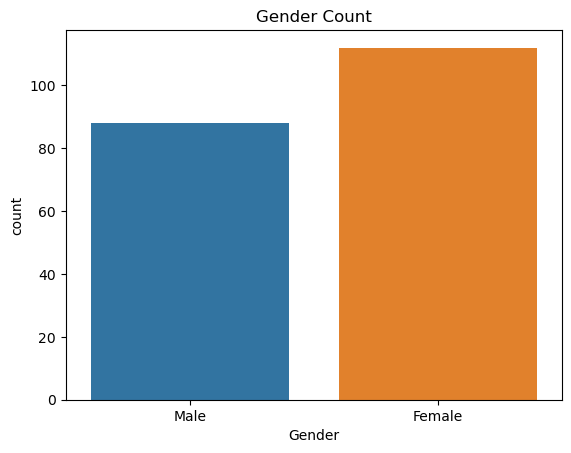

In [37]:
sns.countplot(data=data,x="Gender")
plt.title("Gender Count")
plt.show()

In [17]:
fig = px.histogram(
    data_frame=data,
    x="Gender",
    title="Gender Count",
    color_discrete_sequence=["pink"],
    text_auto=True,
)
fig.show()

It seems there are more "Female" customers than "Male" customers

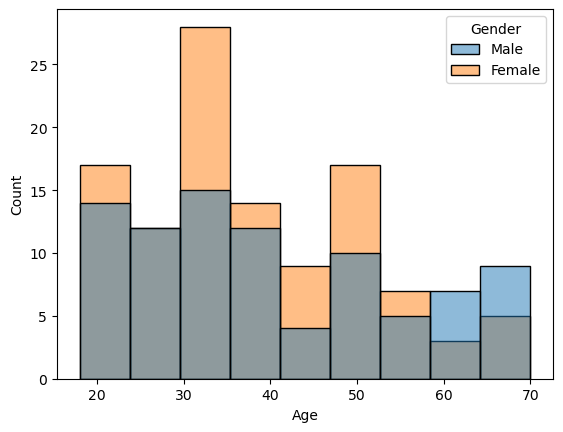

In [43]:
sns.histplot(data=data,x="Age",hue="Gender")
plt.show()


In [18]:
fig = px.histogram(
    data_frame=data,
    x="Age",
    title="Age with Gender",
    facet_col="Gender",
    color_discrete_sequence=["pink"],
    height=500,
)
fig.update_layout(bargap=0.2)
fig.show()

There are many "Female" customers between the age from "30-35"

### Spending Score

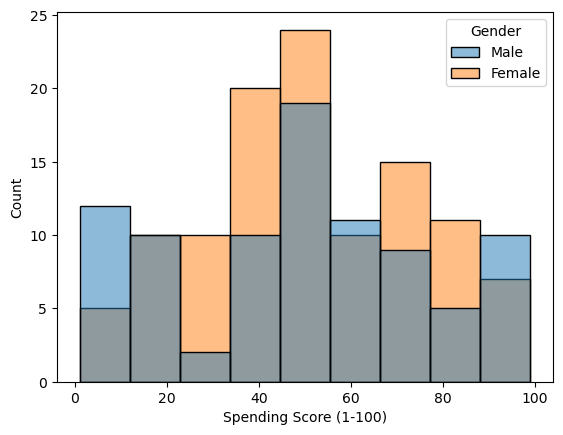

In [44]:
sns.histplot(data=data,x="Spending Score (1-100)",hue="Gender")
plt.show()

In [19]:
fig = px.histogram(
    data_frame`=data,
    x="Spending Score (1-100)",
    title="Spending Score with Gender",
    facet_col="Gender",
    color_discrete_sequence=["pink"],
    height=500,
)
fig.update_layout(bargap=0.2)
fig.show()

"Female" customers have most of the 70-100 spending score

### Income

In [20]:
data.groupby(["Gender"]).agg(Average_Spending=("Spending Score (1-100)", "mean"))

,Average_Spending
Gender,
Female,51.526786
Male,48.511364


In [21]:
data.groupby("Gender").agg(Average_Income=("Annual Income (k$)", "mean"))

,Average_Income
Gender,
Female,59.250000
Male,62.227273


Even though "Male" has more average income they spend less money

In [22]:
fig = px.histogram(
    data_frame=data,
    x="Annual Income (k$)",
    title="Annual Income with Gender",
    facet_col="Gender",
    color_discrete_sequence=["pink"],
    height=500,
)
fig.update_layout(bargap=0.2)
fig.show()

###  Age and Income

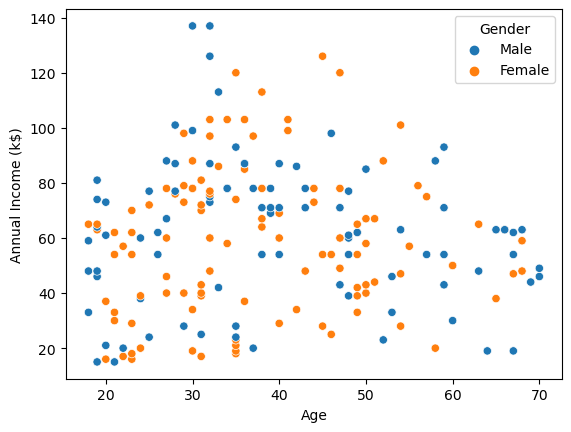

In [45]:
sns.scatterplot(data=data,x="Age",y="Annual Income (k$)",hue="Gender")
plt.show()

In [23]:
fig = px.scatter(
    data_frame=data,
    x="Age",
    y="Annual Income (k$)",
    title="Age vs Income",
    color="Gender",
)
fig.show()

People with age less than 30 and greater than 60 has low "Annual Income"

### Age and Spending Score

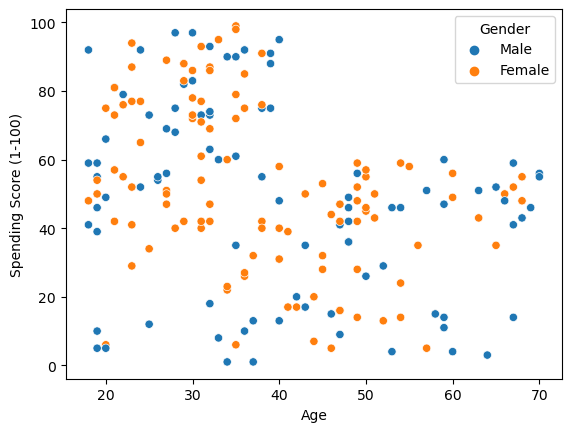

In [47]:
sns.scatterplot(data=data,x="Age",y="Spending Score (1-100)",hue="Gender")
plt.show()

In [24]:
fig = px.scatter(
    data_frame=data,
    x="Age",
    y="Spending Score (1-100)",
    title="Age vs Spending Score",
    color="Gender",
)
fig.show()

"Age" above 40 spend very less

## Income and Spending Score

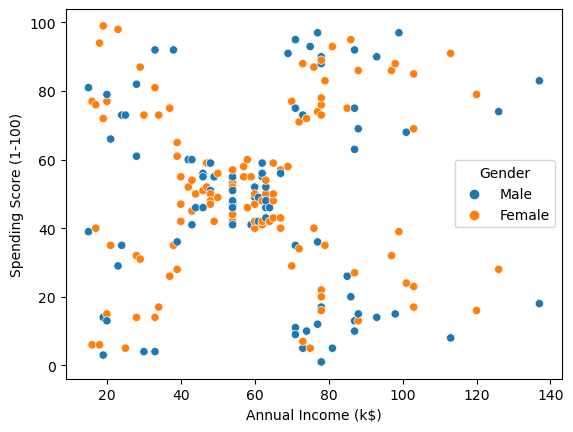

In [48]:
sns.scatterplot(data=data,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")
plt.show()

In [25]:
fig = px.scatter(
    data_frame=data,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    title="Annual Income vs Spending Score",
    color="Gender",
)
fig.show()

There is definitely a pattern here
We will explore it using KMeans

## Creating the model

### Scaling
To give every feature the same significance we scale the data before training the model

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [27]:
data_new = data.iloc[:, [2, 3]]

In [28]:
scaler.fit(data_new)

StandardScaler()

In [29]:
data_scaled = scaler.transform(data_new)

### Elbow Method
In KMeans clustering ,We use elbow method to select optimal no of clusters

In [30]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [31]:
fig = px.line(
    x=range(1, 10),
    y=wcss,
    title="Elbow Method",
    height=450,
    width=550,
    color_discrete_sequence=["red"],
)
fig.update_layout(xaxis_title="No of Clusters", yaxis_title="WCSS")
fig.show()

We will consider 5 as optimal clusters

In [32]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(data_new)
data_new["Clusters"] = clusters
data_new.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


### Center of Clusters

In [33]:
clusters = kmeans.cluster_centers_
clusters

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

## Visualizing the Clusters

In [34]:
data_new["Clusters"] = data_new["Clusters"].apply(lambda x: f"Cluster {x + 1}")

In [35]:
fig = px.scatter(
    data_frame=data_new,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    title="Clustering Result",
    color="Clusters",
)
fig.show()

### From this we can say there are 5 types of people
1 . Low Income & High Spender
2 . Mid Income & Mid Spender
3 . Low Income & Low Spender
4 . High Income & Low Spender
5 . High Income & High Spender